In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline
sns.set(style="white")

In [10]:
# get market info for bitcoin from the start of Aug 7, 2015 to the current day
start_date = "20150807"
start_date_ = '2015-08-07'

bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start="+start_date+"&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
# bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# look at the first few rows
bitcoin_market_info.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-03-04,11497.4,11512.6,11136.1,11512.6,6084150000,194289000000
1,2018-03-03,11101.9,11528.2,11002.4,11489.7,6690570000,187581000000
2,2018-03-02,10977.4,11189.0,10850.1,11086.4,7620590000,185456000000
3,2018-03-01,10385.0,11052.3,10352.7,10951.0,7317280000,175427000000
4,2018-02-28,10687.2,11089.8,10393.1,10397.9,6936190000,180510000000


In [11]:
bitcoin_market_info.describe()

,Open,High,Low,Close,Volume,Market Cap
count,941.000000,941.000000,941.000000,941.000000,9.410000e+02,9.410000e+02
mean,2571.868002,2674.417046,2463.403507,2583.531722,1.680648e+09,4.256591e+10
std,3876.534896,4063.711289,3652.712921,3886.445636,3.722760e+09,6.521249e+10
min,210.070000,226.320000,199.570000,210.500000,1.271260e+07,3.053250e+09
25%,435.320000,443.690000,429.080000,436.570000,6.021520e+07,6.636280e+09
50%,740.710000,747.930000,732.730000,740.980000,1.218870e+08,1.184430e+10
75%,2680.910000,2765.170000,2583.190000,2686.810000,1.245100e+09,4.406100e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11


In [12]:
# get market info for ethereum from the start of Aug 7, 2015  to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start="+start_date+"&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# look at the first few rows
eth_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-03-04,856.19,867.95,840.28,866.68,1697940000,83877800000
1,2018-03-03,856.71,868.45,855.21,857.23,1699370000,83911700000
2,2018-03-02,871.76,876.38,852.42,856.85,1894420000,85368100000
3,2018-03-01,856.01,880.30,851.92,872.20,1868520000,83808200000
4,2018-02-28,877.93,890.11,855.12,855.20,1963980000,85936400000


In [13]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

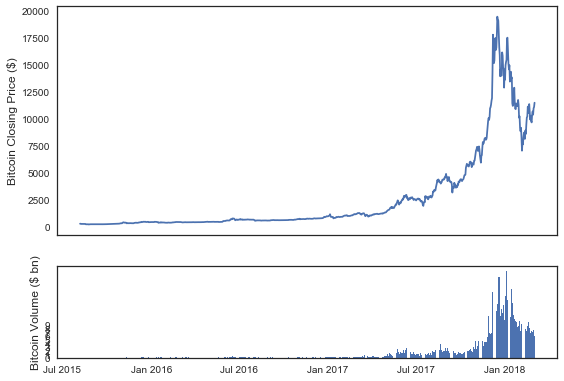

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[5, 2]})
ax1.set_ylabel('Bitcoin Closing Price ($)',fontsize=12)
ax2.set_ylabel('Bitcoin Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
plt.show()

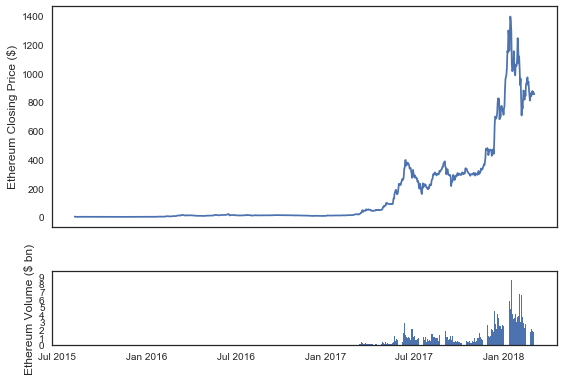

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Ethereum Closing Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime),eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
plt.show()

In [16]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = market_info[market_info['Date']>=start_date_]

for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2018-03-04,11497.4,11512.6,11136.1,11512.6,6084150000,194289000000,856.19,867.95,840.28,866.68,1697940000,83877800000,0.001322,0.012252
1,2018-03-03,11101.9,11528.2,11002.4,11489.7,6690570000,187581000000,856.71,868.45,855.21,857.23,1699370000,83911700000,0.034931,0.000607
2,2018-03-02,10977.4,11189.0,10850.1,11086.4,7620590000,185456000000,871.76,876.38,852.42,856.85,1894420000,85368100000,0.009929,-0.017103
3,2018-03-01,10385.0,11052.3,10352.7,10951.0,7317280000,175427000000,856.01,880.30,851.92,872.20,1868520000,83808200000,0.054502,0.018913
4,2018-02-28,10687.2,11089.8,10393.1,10397.9,6936190000,180510000000,877.93,890.11,855.12,855.20,1963980000,85936400000,-0.027070,-0.025890


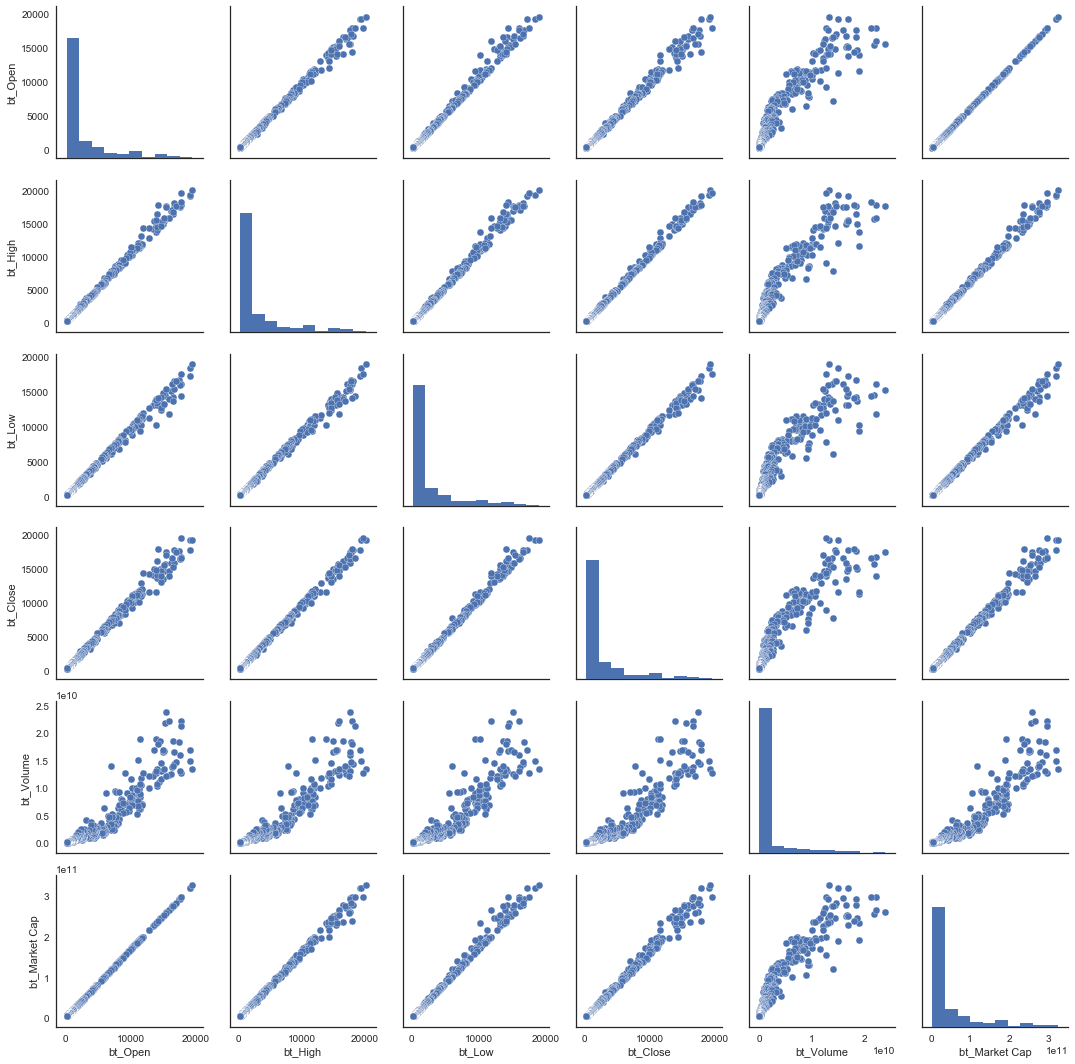

In [17]:
sns.pairplot(bitcoin_market_info)

In [ ]:
# Open and Market Cap are directly related. So, one of these could be dropped